In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
# read in csv file and creating an original df which we wont change. dropping certain unnecessary columns and renaming the necessary columns.
# Also add the column of percentage change of the unemployment rate.

csv_file_path = r'..\Data\Unemployment\unemployment-rate.csv'
df_un_original = pd.read_csv(csv_file_path)
df_un = df_un_original.copy()
df_un = df_un.drop(columns=['Code'])
df_un.rename(columns={'Entity': 'country', 'Year' : 'year', 'Unemployment, total (% of total labor force) (modeled ILO estimate)' : 'unemployment_%'}, inplace=True)
df_un['unemployment_change_%'] = df_un['unemployment_%'].pct_change() * 100
df_un = df_un.dropna()
df_un['year'].unique()
df_un.head()

,country,year,unemployment_%,unemployment_change_%
1,Afghanistan,1992,10.821,1.615175
2,Afghanistan,1993,10.723,-0.905646
3,Afghanistan,1994,10.726,0.027977
4,Afghanistan,1995,11.179,4.223382
5,Afghanistan,1996,10.962,-1.941140


In [40]:
# read in csv file and creating an original df which we wont change. dropping certain unnecessary columns and renaming the necessary columns.
# changing the start year to 1991 since the unemployment df goes bac to 1991.

csv_file_path = r'..\Data\GDP_growth\real-gdp-growth.csv'
df_gdp_rate_original = pd.read_csv(csv_file_path)
df_gdp_rate = df_gdp_rate_original.copy()
df_gdp_rate = df_gdp_rate.drop(columns=['Code', 'Gross domestic product, constant prices - Percent change - Forecasts'])
df_gdp_rate = df_gdp_rate[df_gdp_rate['Year'] >= 1991]
df_gdp_rate.rename(columns={'Entity': 'country', 'Gross domestic product, constant prices - Percent change - Observations' : 'gdp_change_%', 'Year' : 'year'}, inplace=True)
df_gdp_rate.columns

Index(['country', 'year', 'gdp_change_%'], dtype='object')

In [51]:
# Merging Gdp and unemployment data sets on country and year, dropping unnecessary columns.

merged_df = pd.merge(df_gdp_rate, df_un, on=['country', 'year'], how='inner')
merged_df.head(30)

,country,year,gdp_change_%,unemployment_%,unemployment_change_%
0,Afghanistan,2003,8.692,11.141,-1.030470
1,Afghanistan,2004,0.671,10.988,-1.373306
2,Afghanistan,2005,11.830,11.217,2.084092
3,Afghanistan,2006,5.361,11.099,-1.051975
4,Afghanistan,2007,13.340,11.301,1.819984
5,Afghanistan,2008,3.863,11.093,-1.840545
6,Afghanistan,2009,20.585,11.311,1.965203
7,Afghanistan,2010,8.438,11.352,0.362479
8,Afghanistan,2011,6.479,11.054,-2.625088
9,Afghanistan,2012,13.968,11.341,2.596345


In [42]:
# Correlation check between gdp change and unemployment change

correlation = merged_df['gdp_change_%'].corr(merged_df['unemployment_change_%'])
print(correlation)

-0.11752896417756258


                              OLS Regression Results                             
Dep. Variable:     unemployment_change_%   R-squared:                       0.014
Model:                               OLS   Adj. R-squared:                  0.014
Method:                    Least Squares   F-statistic:                     74.47
Date:                   Wed, 06 Mar 2024   Prob (F-statistic):           8.02e-18
Time:                           17:08:38   Log-Likelihood:                -28837.
No. Observations:                   5319   AIC:                         5.768e+04
Df Residuals:                       5317   BIC:                         5.769e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6

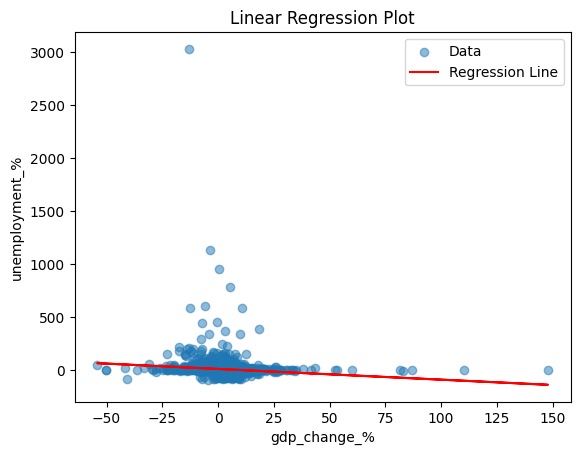

In [44]:
# A more advanced check also giving us the p value and R^2.

missing_values = merged_df.isnull().sum()
df_clean = merged_df.dropna()

X = df_clean['gdp_change_%']
y = df_clean['unemployment_change_%']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(X['gdp_change_%'], y, alpha=0.5, label='Data')
plt.plot(X['gdp_change_%'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('gdp_change_%')
plt.ylabel('unemployment_%')
plt.title('Linear Regression Plot')

plt.legend()
plt.show()

                              OLS Regression Results                             
Dep. Variable:     unemployment_change_%   R-squared:                       0.067
Model:                               OLS   Adj. R-squared:                  0.067
Method:                    Least Squares   F-statistic:                     374.4
Date:                   Wed, 06 Mar 2024   Prob (F-statistic):           1.28e-80
Time:                           17:14:46   Log-Likelihood:                -22477.
No. Observations:                   5219   AIC:                         4.496e+04
Df Residuals:                       5217   BIC:                         4.497e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4

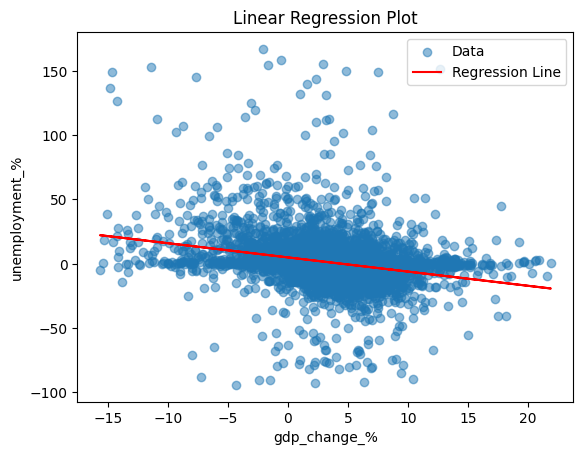

In [52]:
# This time a correlation calculation but without the extreme values. This because extreme values can distort the outcome of a correlation meassurement.
#The extreme's are calculated using the z score and taken out of the df.

df_clean = merged_df.dropna()

z_scores_gdp = stats.zscore(df_clean['gdp_change_%'])
z_scores_unemployment = stats.zscore(df_clean['unemployment_change_%'])
threshold = 3

merged_df_no_extreme = df_clean[(abs(z_scores_gdp) < threshold) & (abs(z_scores_unemployment) < threshold)]

X = merged_df_no_extreme['gdp_change_%']
y = merged_df_no_extreme['unemployment_change_%']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(X['gdp_change_%'], y, alpha=0.5, label='Data')
plt.plot(X['gdp_change_%'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('gdp_change_%')
plt.ylabel('unemployment_%')
plt.title('Linear Regression Plot')

plt.legend()
plt.show()

Overall, the results suggest that there is a statistically significant negative relationship between the percentage change in GDP and the unemployment rate, although the explanatory power of the model is very low (R-squared is low). 

In [53]:
# Correlation check without the extreme values in the set.
correlation = merged_df_no_extreme['gdp_change_%'].corr(merged_df_no_extreme['unemployment_change_%'])
print(correlation)

-0.25877739357527374


In [48]:
#merged_df_no_extreme.to_csv('gdp_un_no_extreme.csv', index=False)

In [54]:
merged_df_no_extreme.describe()

,year,gdp_change_%,unemployment_%,unemployment_change_%
count,5219.000000,5219.000000,5219.000000,5219.000000
mean,2006.385706,3.493511,8.237797,1.097503
std,8.749271,4.365584,6.399361,18.587881
min,1991.000000,-15.671000,0.100000,-94.011976
25%,1999.000000,1.449000,3.770000,-5.187356
50%,2006.000000,3.717000,6.368000,0.000000
75%,2014.000000,5.972000,10.880000,4.203300
max,2021.000000,21.924000,38.800000,167.011643


                            OLS Regression Results                            
Dep. Variable:       unemployment_log   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     92.14
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.22e-21
Time:                        17:08:46   Log-Likelihood:                 7367.0
No. Observations:                5219   AIC:                        -1.473e+04
Df Residuals:                    5217   BIC:                        -1.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4356      0.083     65.195      0.0

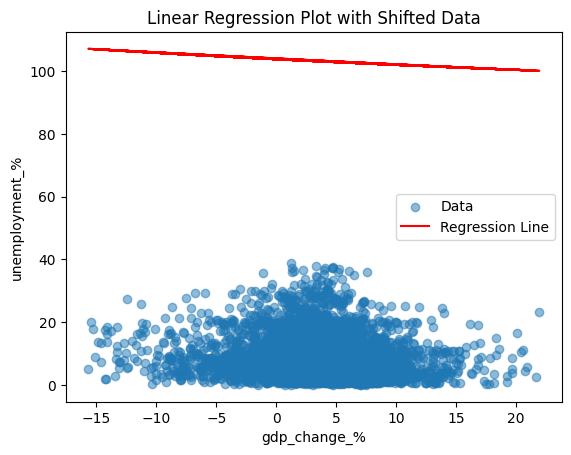

In [49]:
# Transforming both data to log, hoping it will better fit the model. 

df_log = merged_df_no_extreme.copy()
df_log.dropna(subset=['gdp_change_%', 'unemployment_%'], inplace=True)

# Adding min value to gdp and unemployment because you cant get log from a negative number.
constant_value = abs(df_log['unemployment_change_%'].min()) + 1

df_log['gdp_shifted'] = df_log['gdp_change_%'] + constant_value
df_log['unemployment_shifted'] = df_log['unemployment_%'] + constant_value


df_log['gdp_log'] = np.log(df_log['gdp_shifted'])
df_log['unemployment_log'] = np.log(df_log['unemployment_shifted'])

X_log = df_log['gdp_log']
y_log = df_log['unemployment_log']
X_log = sm.add_constant(X_log)
model_log = sm.OLS(y_log, X_log).fit()


print(model_log.summary())


plt.scatter(df_log['gdp_change_%'], df_log['unemployment_%'], alpha=0.5, label='Data')
plt.plot(df_log['gdp_change_%'], np.exp(model_log.predict(X_log)), color='red', label='Regression Line')
plt.xlabel('gdp_change_%')
plt.ylabel('unemployment_%')
plt.title('Linear Regression Plot with Shifted Data')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:      unemployment_sqrt   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     90.25
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           3.12e-21
Time:                        17:18:32   Log-Likelihood:                -1219.3
No. Observations:                5219   AIC:                             2443.
Df Residuals:                    5217   BIC:                             2456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9588      0.190     63.018      0.0

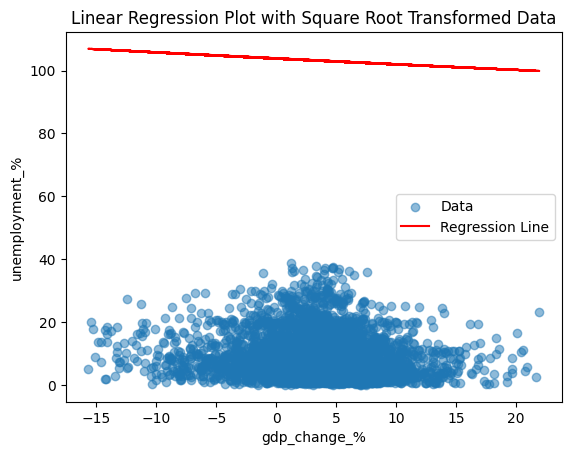

In [55]:
# Transforming both data to log, hoping it will better fit the model. 

df_sqrt = merged_df_no_extreme.copy()
df_sqrt.dropna(subset=['gdp_change_%', 'unemployment_%'], inplace=True)

# Adding min value to gdp and unemployment because you cant sqrt a negative number.
constant_value = abs(df_sqrt['unemployment_change_%'].min()) + 1

df_sqrt['gdp_shifted'] = df_sqrt['gdp_change_%'] + constant_value
df_sqrt['unemployment_shifted'] = df_sqrt['unemployment_%'] + constant_value

df_sqrt['gdp_sqrt'] = np.sqrt(df_sqrt['gdp_shifted'])
df_sqrt['unemployment_sqrt'] = np.sqrt(df_sqrt['unemployment_shifted'])

X_sqrt = df_sqrt['gdp_sqrt']
y_sqrt = df_sqrt['unemployment_sqrt']
X_sqrt = sm.add_constant(X_sqrt)
model_sqrt = sm.OLS(y_sqrt, X_sqrt).fit()

print(model_sqrt.summary())

plt.scatter(df_sqrt['gdp_change_%'], df_sqrt['unemployment_%'], alpha=0.5, label='Data')
plt.plot(df_sqrt['gdp_change_%'], np.square(model_sqrt.predict(X_sqrt)), color='red', label='Regression Line')
plt.xlabel('gdp_change_%')
plt.ylabel('unemployment_%')
plt.title('Linear Regression Plot with Square Root Transformed Data')
plt.legend()
plt.show()